### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 6
### Due: Friday, Oct 13 at 11:59 pm CT

## Problem 1

This week also we have only one problem worth 20 points. This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw6_data.npy`. This is a (50 x 2) numpy array, with measurements in the first column and uncertainties in the second column. Using the analytic results for heteroscedastic Gaussian data from lectures, compute the sample mean and the standard error on the sample mean from for this data.

2) Using the bootstrap method, generate $1000$ bootstrap realizations of this dataset. *DO NOT use the `astroML` code. Write your own bootstrap function from scratch. Also recall that when resampling data, measurements and uncertainties should stay paired together.*

3) Compute sample mean for all $1000$ boostrap datasets to find the distribution of the sample mean. Plot a normalized histogram of these bootstrap means, and overplot a Gaussian pdf with the mean and std found in (1). Do these agree?

4) Write a code to generate $50$ Jackknife datasets using the Jackknife method with one leave-off.  *DO NOT use the `astroML` code*. 

5) Compute sample mean for all $50$ Jackknife datasets to find the distribution of the sample mean. Plot a normalized histogram of these Jackknife means, and overplot a Gaussian pdf with the mean and std found in (1). Do these agree?

<h2> 1. Computing sample mean and standard error </h2>

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from hw6_data.npy
data = np.load('hw6_data.npy')

# Extract measurements and uncertainties from the data
measurements = data[:, 0]
uncertainties = data[:, 1]

# Compute the sample mean
sample_mean = np.mean(measurements)

# Compute the standard error on the sample mean using the formula for heteroscedastic data
# Standard Error on the Sample Mean (SEM) = sqrt(Σ(σ_i^2) / N^2)

standard_error = np.sqrt(np.sum(uncertainties**2) / (len(measurements)**2))

print(f"Sample Mean: {sample_mean}")
print(f"Standard Error on the Sample Mean: {standard_error}")


Sample Mean: 3.937547512109005
Standard Error on the Sample Mean: 0.12989600766741974


<h2> 2. Generating 1000 Bootstrap realisations</h2> 

In [39]:

# Number of bootstrap realizations
num_bootstrap_samples = 1000

# Initialize an array to store the bootstrap means
bootstrap_means = np.zeros(num_bootstrap_samples)

# Perform the bootstrap resampling
for i in range(num_bootstrap_samples):
    # Generate random indices with replacement
    indices = np.random.choice(len(measurements), len(measurements), replace=True)
    
    # Use the indices to select the measurements and uncertainties for the bootstrap sample
    bootstrap_measurements = measurements[indices]
    bootstrap_uncertainties = uncertainties[indices]
    
    # Compute the mean of the bootstrap sample
    bootstrap_mean = np.sum(bootstrap_measurements / bootstrap_uncertainties**2) / np.sum(1 / bootstrap_uncertainties**2)
    
    # Store the bootstrap mean in the array
    bootstrap_means[i] = bootstrap_mean

# Now, we have an array of 1000 bootstrap means




<h2> 3. Plotting the histogram of Bootstrap means </h2>

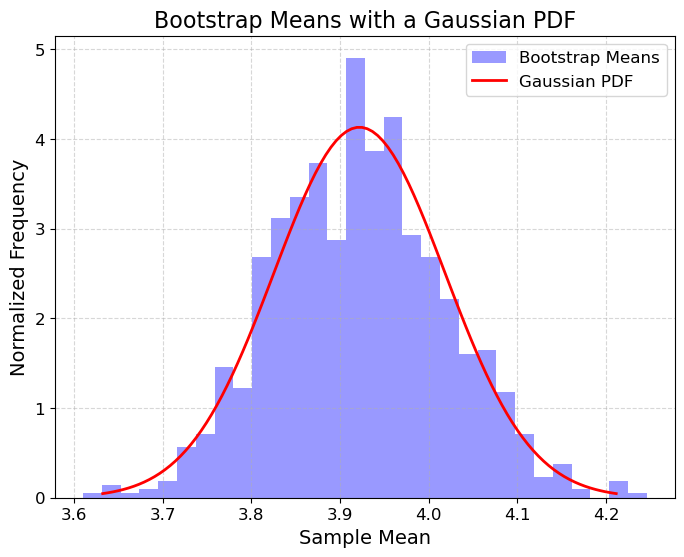

In [40]:
from scipy.stats import norm  # Import the normal distribution


# Calculate the mean and standard deviation of the bootstrap means
mean_of_bootstrap_means = np.mean(bootstrap_means)
std_of_bootstrap_means = np.std(bootstrap_means)


# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a histogram of the bootstrap means
ax.hist(bootstrap_means, bins=30, density=True, alpha=0.4, color='b', label='Bootstrap Means')

# Create a range of values for the x-axis (theoretical PDF)
x = np.linspace(mean_of_bootstrap_means - 3 * std_of_bootstrap_means, mean_of_bootstrap_means + 3 * std_of_bootstrap_means, 100)
pdf = norm.pdf(x, loc=mean_of_bootstrap_means, scale=std_of_bootstrap_means)

# Plot the Gaussian PDF
ax.plot(x, pdf, 'r', lw=2, label='Gaussian PDF')

# Set labels and a legend
ax.set_xlabel('Sample Mean', fontsize=14)
ax.set_ylabel('Normalized Frequency', fontsize=14)
ax.legend(fontsize=12)

# Add a title
ax.set_title("Bootstrap Means with a Gaussian PDF", fontsize=16)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.5)

# Customize the tick labels
ax.tick_params(axis='both', labelsize=12)

# Show the plot
plt.show()

In [41]:
print(mean_of_bootstrap_means, std_of_bootstrap_means)

3.9219792125217854 0.09654711639727113


The sample mean agrees with what we got before, but the Std Dev is a bit off

<h2> 4. Constructing Jackknife datasets </h2>

In [60]:
import numpy as np

# Load the original data from hw6_data.npy
data = np.load('hw6_data.npy')

# Extract measurements and uncertainties from the data
measurements = data[:, 0]
uncertainties = data[:, 1]

# Number of data points
num_data_points = len(measurements)

# Initialize a list to store the Jackknife datasets
jackknife_datasets = []

# Create 100 Jackknife datasets by leaving one data point out at a time
for i in range(num_data_points):
    # Exclude the i-th data point
    jackknife_sample = np.delete(data, i, axis=0)
    jackknife_datasets.append(jackknife_sample)

# Verify the shape of the jackknife_datasets list
shape = np.shape(jackknife_datasets)
print(f"Shape of jackknife_datasets: {shape}")


Shape of jackknife_datasets: (100, 99, 2)


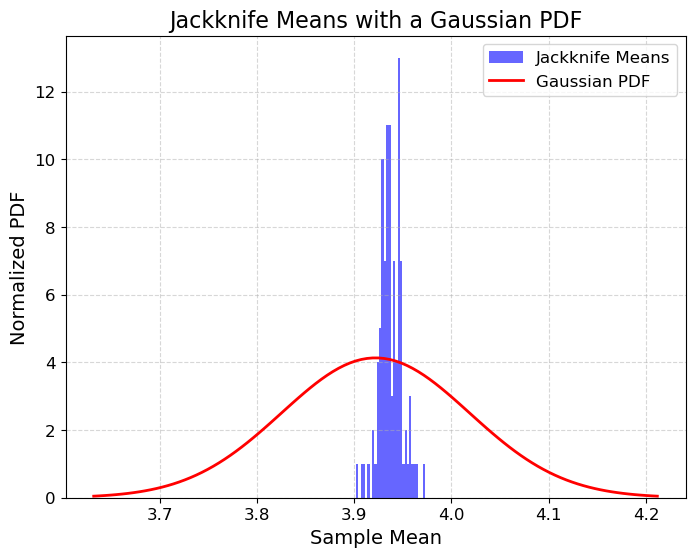

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Initialize a list to store the Jackknife means
jackknife_means = []

# Create 100 Jackknife datasets by leaving one data point out at a time
for i in range(num_data_points):
    # Exclude the i-th data point
    jackknife_sample = np.delete(data, i, axis=0)
    
    # Calculate the mean of the Jackknife sample
    jackknife_mean = np.mean(jackknife_sample[:, 0])
    
    jackknife_means.append(jackknife_mean)

# Calculate the mean and standard deviation of the Jackknife means
mean_of_jackknife_means = np.mean(jackknife_means)
std_of_jackknife_means = np.std(jackknife_means)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a histogram of the Jackknife means
ax.hist(jackknife_means, bins=30, alpha=0.6, color='b', label='Jackknife Means')

# Create a range of values for the x-axis (theoretical PDF)
x = np.linspace(mean_of_bootstrap_means - 3 * std_of_bootstrap_means, mean_of_bootstrap_means + 3 * std_of_bootstrap_means, 100)
pdf = norm.pdf(x, loc=mean_of_bootstrap_means, scale=std_of_bootstrap_means)

# Plot the Gaussian PDF
ax.plot(x, pdf, 'r', lw=2, label='Gaussian PDF')

# Set labels and a legend
ax.set_xlabel('Sample Mean', fontsize=14)
ax.set_ylabel('Normalized PDF', fontsize=14)
ax.legend(fontsize=12)

# Add a title
ax.set_title("Jackknife Means with a Gaussian PDF", fontsize=16)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.5)

# Customize the tick labels
ax.tick_params(axis='both', labelsize=12)

# Show the plot
plt.show()
